## Observations and Insights 

In [158]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()
# Combine the data into a single dataset
combine_df = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')
# Display the data table for preview
combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [159]:
# Checking the number of mice.
combine_df['Mouse ID'].count()


1893

In [160]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combine_df[combine_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [161]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_df.loc[combine_df['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [162]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df.drop_duplicates(['Mouse ID','Timepoint'])

In [163]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].count()

1888

## Summary Statistics

In [164]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cdf_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
cdf_mean
cdf_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
cdf_median
cdf_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
cdf_variance
cdf_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
cdf_std
cdf_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
cdf_sem
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
sum_df = [['mean':cdf_mean,'median':cdf_median,'var':cdf_variance,'std':cdf_std,'sem':cdf_sem]]
sum_df



SyntaxError: invalid syntax (<ipython-input-164-90b6c0367b1c>, line 16)

In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['sum','mean','median','std'])


,sum,mean,median,std
Drug Regimen,,,,
Capomulin,9355.420462,40.675741,41.557809,4.994774
Ceftamin,9361.228582,52.591172,51.776157,6.268188
Infubinol,9413.493529,52.884795,51.820584,6.567243
Ketapril,10384.299876,55.235638,53.698743,8.279709
Naftisol,10105.671026,54.331565,52.509285,8.134708
Placebo,9780.078122,54.033581,52.288934,7.821003
Propriva,8173.380288,52.393463,50.909965,6.568014
Ramicane,9169.417875,40.216745,40.673236,4.846308
Stelasyn,9816.199991,54.233149,52.431737,7.710419


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

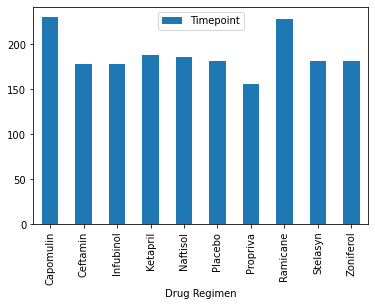

In [148]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

m_c = clean_df[['Drug Regimen','Timepoint']].groupby('Drug Regimen').count()
m_c.plot.bar()

In [149]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
m_c.columns


Index(['Timepoint'], dtype='object')

In [150]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [152]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [153]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [154]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [155]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [156]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [157]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
